## Homework - 04 | Math 4220 - Numerical Analysis: Linear and Nonlinear Problems
Pratyush Sudhakar (ps2245)

### Question 1: Newton's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_error_convergence(error_list, function_name):
    # Plot the errors
    plt.figure(figsize=(10, 6))
    plt.plot(error_list, marker="o", linestyle="-", color="b")
    plt.yscale("log")
    plt.title(f"Error vs. Iteration in Newton's Method for {function_name}")
    plt.xlabel("Iteration")
    plt.ylabel("Error (log scale)")
    plt.grid(True)
    plt.show()

    # Log-log plot for order of convergence
    errors_log = np.log(error_list[:-1])
    next_errors_log = np.log(error_list[1:])

    plt.figure(figsize=(10, 6))
    plt.plot(errors_log, next_errors_log, marker="*", linestyle="None")
    plt.xlabel("Log of error at iteration k")
    plt.ylabel("Log of error at iteration k+1")
    plt.title(f"Convergence Analysis: Order for {function_name}")
    m, c = np.polyfit(errors_log, next_errors_log, 1)
    plt.grid(True)
    plt.show()

    print(f"Order of Convergence for {function_name}: {m:.2f}")

In [4]:
def newton_raphson_method(
    func,
    func_derivative,
    initial_guess,
    known_root=0,
    tolerance=1e-15,
    max_iter=1000,
):
    current_estimate = initial_guess
    error_list = []

    for _ in range(max_iter):
        func_value = func(current_estimate)
        derivative_value = func_derivative(current_estimate)

        if derivative_value == 0:
            raise ValueError("Derivative is zero. No solution found.")

        next_estimate = current_estimate - func_value / derivative_value
        error_list.append(abs(next_estimate - known_root))

        current_estimate = next_estimate

        if abs(next_estimate - known_root) < tolerance:
            return next_estimate, error_list

    return current_estimate, error_list

In [5]:
def solve(func, func_derivative, initial_guess, func_name):
    try:
        root, error_list = newton_raphson_method(func, func_derivative, initial_guess)
        print(f"Root found at: {root}")
        plot_error_convergence(error_list, func_name)
        return error_list
    except RuntimeError as e:
        print(e)
    return None

Root found at: 7.105427357601001e-16


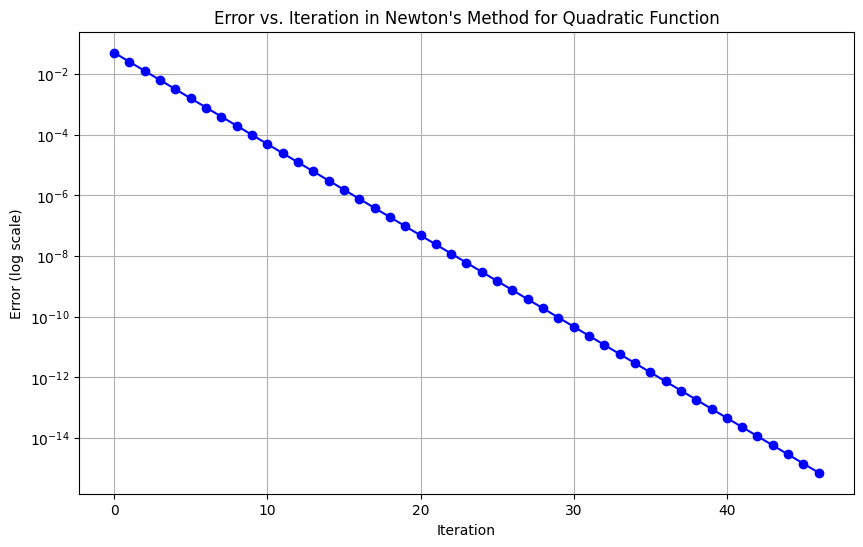

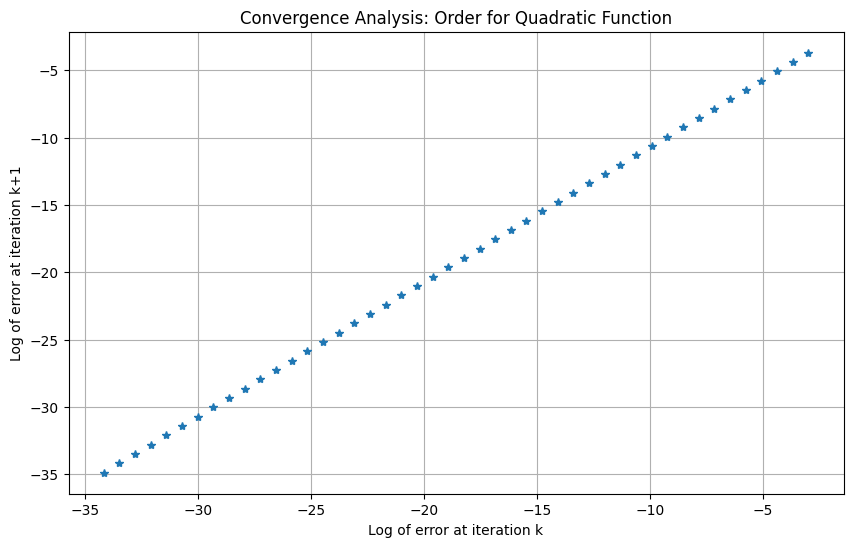

Order of Convergence for Quadratic Function: 1.00


In [6]:
def quad(x):
    return x**2

def quad_derivative(x):
    return 2 * x


initial_guess = 0.1

error_list = solve(quad, quad_derivative, initial_guess, "Quadratic Function")

Root found at: 0.0


C:\Users\praty\AppData\Local\Temp\ipykernel_33968\1531992240.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


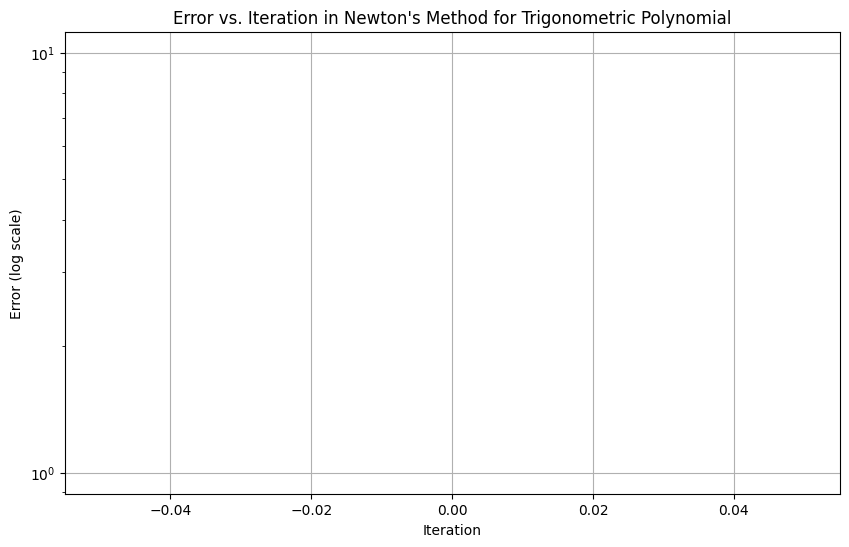

TypeError: expected non-empty vector for x

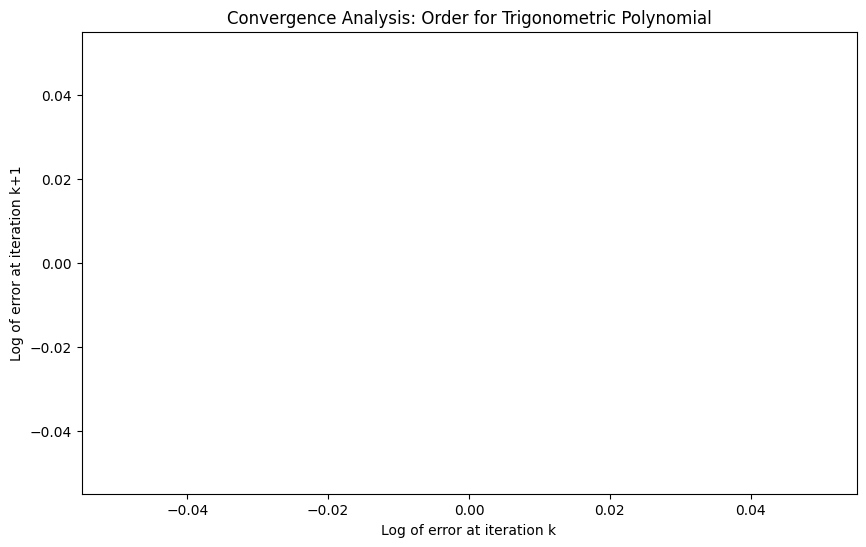

In [7]:
def trig_poly(x):
    return np.sin(x) + x**3

def trig_poly_deriv(x):
    return np.cos(x) + 3 * x**2

initial_guess = 0.1

error_list = solve(trig_poly, trig_poly_deriv, initial_guess, "Trigonometric Polynomial")

In [7]:
def newton_raphson_method(
    func,
    func_derivative,
    initial_guess,
    tolerance=1e-15,
    max_iter=1000,
):
    current_estimate = initial_guess
    error_list = []

    for _ in range(max_iter):
        func_value = func(current_estimate)
        derivative_value = func_derivative(current_estimate)

        if derivative_value == 0:
            raise ValueError("Derivative is zero. No solution found.")

        next_estimate = current_estimate - func_value / derivative_value
        error_list.append(abs(next_estimate - current_estimate))

        if abs(next_estimate - current_estimate) < tolerance:
            return next_estimate, error_list

        current_estimate = next_estimate

    return current_estimate, error_list

Root found at: 0.3183098861837907


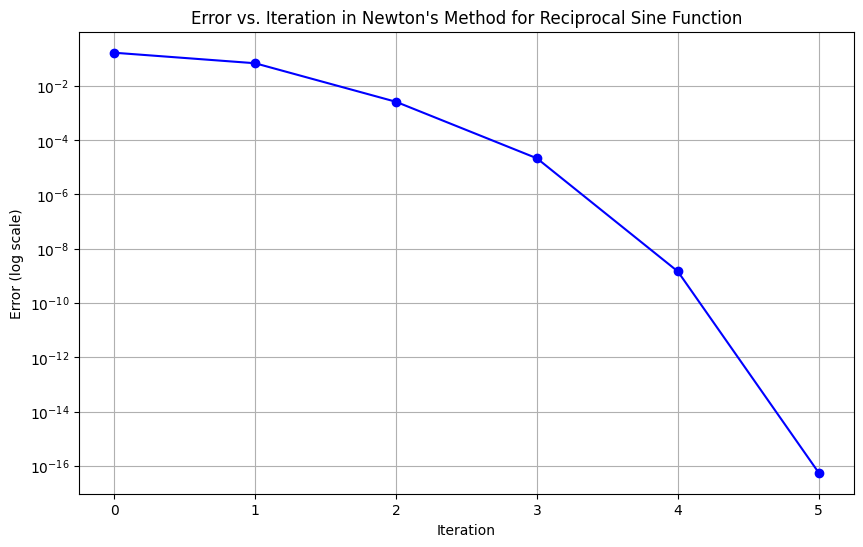

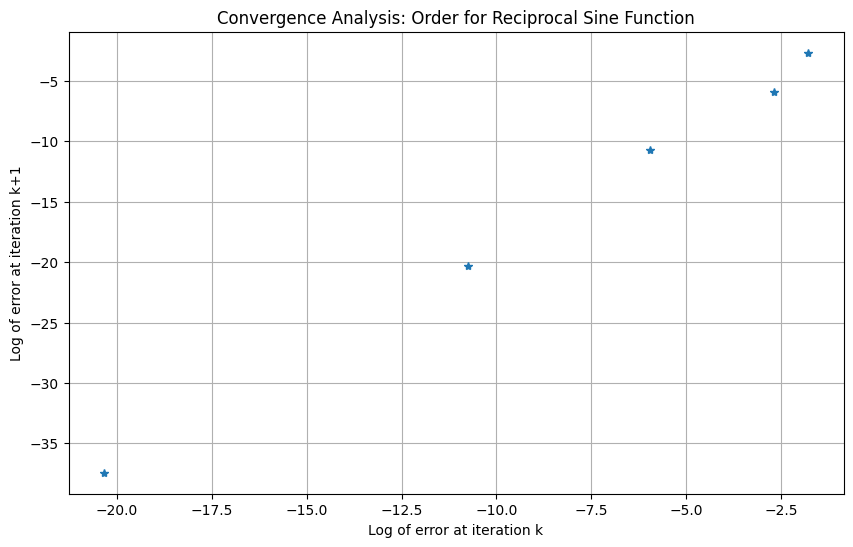

Order of Convergence for Reciprocal Sine Function: 1.84


In [8]:
def reciprocal_sine(x):
    return np.sin(1 / x)


def reciprocal_sine_derivative(x):
    return -np.cos(1 / x) / x**2

initial_guess = 0.42
known_root = 0.42
try:
    error_list = newton_raphson_method(
        reciprocal_sine, reciprocal_sine_derivative, known_root)
    print(f"Root found at: {error_list[0]}")
    plot_error_convergence(error_list[1], "Reciprocal Sine Function")
except ValueError as e:
    print(e)